In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
postcodes_missing = pd.read_csv('flood_tool/example_data/postcodes_missing_data.csv')
postcodes_unlabelled = pd.read_csv('flood_tool/example_data/postcodes_unlabelled.csv')
typical_day = pd.read_csv('flood_tool/example_data/typical_day.csv')
wet_day = pd.read_csv('flood_tool/example_data/wet_day.csv')

In [63]:
district_data = pd.read_csv('flood_tool/resources/district_data.csv')
postcodes_labelled = pd.read_csv('flood_tool/resources/postcodes_labelled.csv')
sector_data = pd.read_csv('flood_tool/resources/sector_data.csv')
stations = pd.read_csv('flood_tool/resources/stations.csv')

In [64]:
postcodes_labelled.duplicated().sum()

0

In [65]:
postcodes_labelled.isnull().sum() # nearestWatercourse = 30091, medianPrice = 6202

postcode                     0
easting                      0
northing                     0
soilType                     0
elevation                    0
nearestWatercourse       30091
distanceToWatercourse        0
localAuthority               0
riskLabel                    0
medianPrice               6202
historicallyFlooded          0
dtype: int64

In [66]:
postcodes_unlabelled.head()

,postcode,easting,northing,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority
0,PO9 5EA,472101,108419,Unsurveyed/Urban,40,NaN,1530.0,Havant
1,EX15 3XE,313905,113519,Luvisols,130,River Culm,310.0,Mid Devon
2,PO14 4RJ,452325,106646,Unsurveyed/Urban,40,NaN,1270.0,Fareham
3,SE24 9UX,532008,174437,Unsurveyed/Urban,20,River Thames,5290.0,Lambeth
4,BS20 9PR,346765,176083,Unsurveyed/Urban,10,NaN,640.0,North Somerset


In [67]:
from flood_tool.geo import get_gps_lat_long_from_easting_northing
coordinates_lat = get_gps_lat_long_from_easting_northing(postcodes_labelled['easting'], postcodes_labelled['northing'])
coordinates_df = pd.DataFrame({
    'Latitude': coordinates_lat[0],
    'Longitude': coordinates_lat[1]
})
postcodes_labelled = pd.concat([postcodes_labelled, coordinates_df], axis=1)
postcodes_labelled.drop(columns=['easting', 'northing'], inplace=True)
postcodes_labelled.head()

,postcode,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded,Latitude,Longitude
0,BA1 1AL,Unsurveyed/Urban,20,River Avon,1240.0,Bath and North East Somerset,5,621800.0,1,51.379625,-2.363284
1,BA1 1AN,Unsurveyed/Urban,20,River Avon,1550.0,Bath and North East Somerset,3,577900.0,0,51.379000,-2.358926
2,BA1 1AR,Unsurveyed/Urban,20,River Avon,1540.0,Bath and North East Somerset,5,533300.0,1,51.378585,-2.359282
3,BA1 1BG,Unsurveyed/Urban,30,River Avon,1450.0,Bath and North East Somerset,1,563600.0,0,51.383215,-2.359763
4,BA1 1BH,Unsurveyed/Urban,30,River Avon,1410.0,Bath and North East Somerset,1,570800.0,0,51.382862,-2.360321


In [68]:
postcodes_labelled.to_csv('postcodes_labelled.csv', index=False)

1. task 1: postocodes_labelled.shape: predict risk flood, want to have high recall. 

In [40]:
postcodes_labelled.head()



,postcode,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded,Latitude,Longitude
0,BA1 1AL,Unsurveyed/Urban,20,River Avon,1240.0,Bath and North East Somerset,5,621800.0,1,51.379625,-2.363284
1,BA1 1AN,Unsurveyed/Urban,20,River Avon,1550.0,Bath and North East Somerset,3,577900.0,0,51.379000,-2.358926
2,BA1 1AR,Unsurveyed/Urban,20,River Avon,1540.0,Bath and North East Somerset,5,533300.0,1,51.378585,-2.359282
3,BA1 1BG,Unsurveyed/Urban,30,River Avon,1450.0,Bath and North East Somerset,1,563600.0,0,51.383215,-2.359763
4,BA1 1BH,Unsurveyed/Urban,30,River Avon,1410.0,Bath and North East Somerset,1,570800.0,0,51.382862,-2.360321


<Axes: >

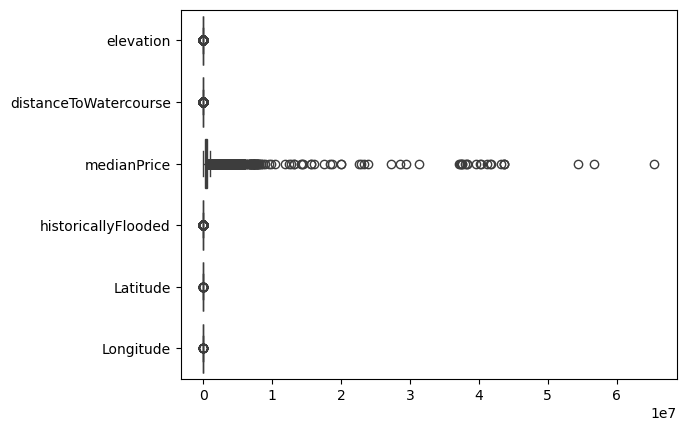

In [41]:
sns.boxplot(postcodes_labelled.drop(columns='riskLabel'), orient='h' )

Task 2: predict house pricees

In [42]:
postcodes_labelled.head()

,postcode,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded,Latitude,Longitude
0,BA1 1AL,Unsurveyed/Urban,20,River Avon,1240.0,Bath and North East Somerset,5,621800.0,1,51.379625,-2.363284
1,BA1 1AN,Unsurveyed/Urban,20,River Avon,1550.0,Bath and North East Somerset,3,577900.0,0,51.379000,-2.358926
2,BA1 1AR,Unsurveyed/Urban,20,River Avon,1540.0,Bath and North East Somerset,5,533300.0,1,51.378585,-2.359282
3,BA1 1BG,Unsurveyed/Urban,30,River Avon,1450.0,Bath and North East Somerset,1,563600.0,0,51.383215,-2.359763
4,BA1 1BH,Unsurveyed/Urban,30,River Avon,1410.0,Bath and North East Somerset,1,570800.0,0,51.382862,-2.360321


<Axes: >

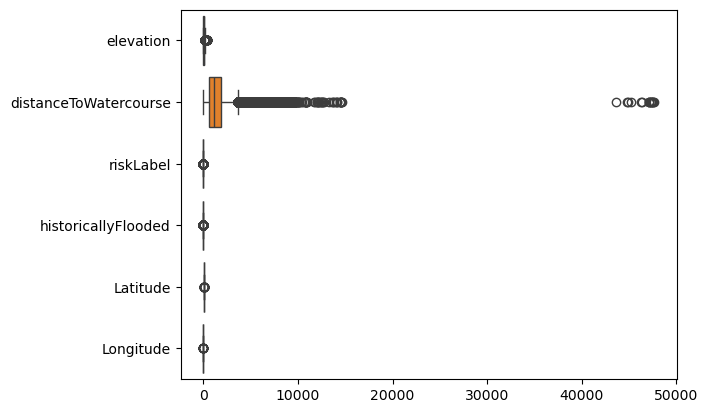

In [43]:
sns.boxplot(postcodes_labelled.drop(columns='medianPrice'), orient='h' )

elevation, robust scaler, distance to watercourse robust scaler, log on median and distance to Watercourse. 

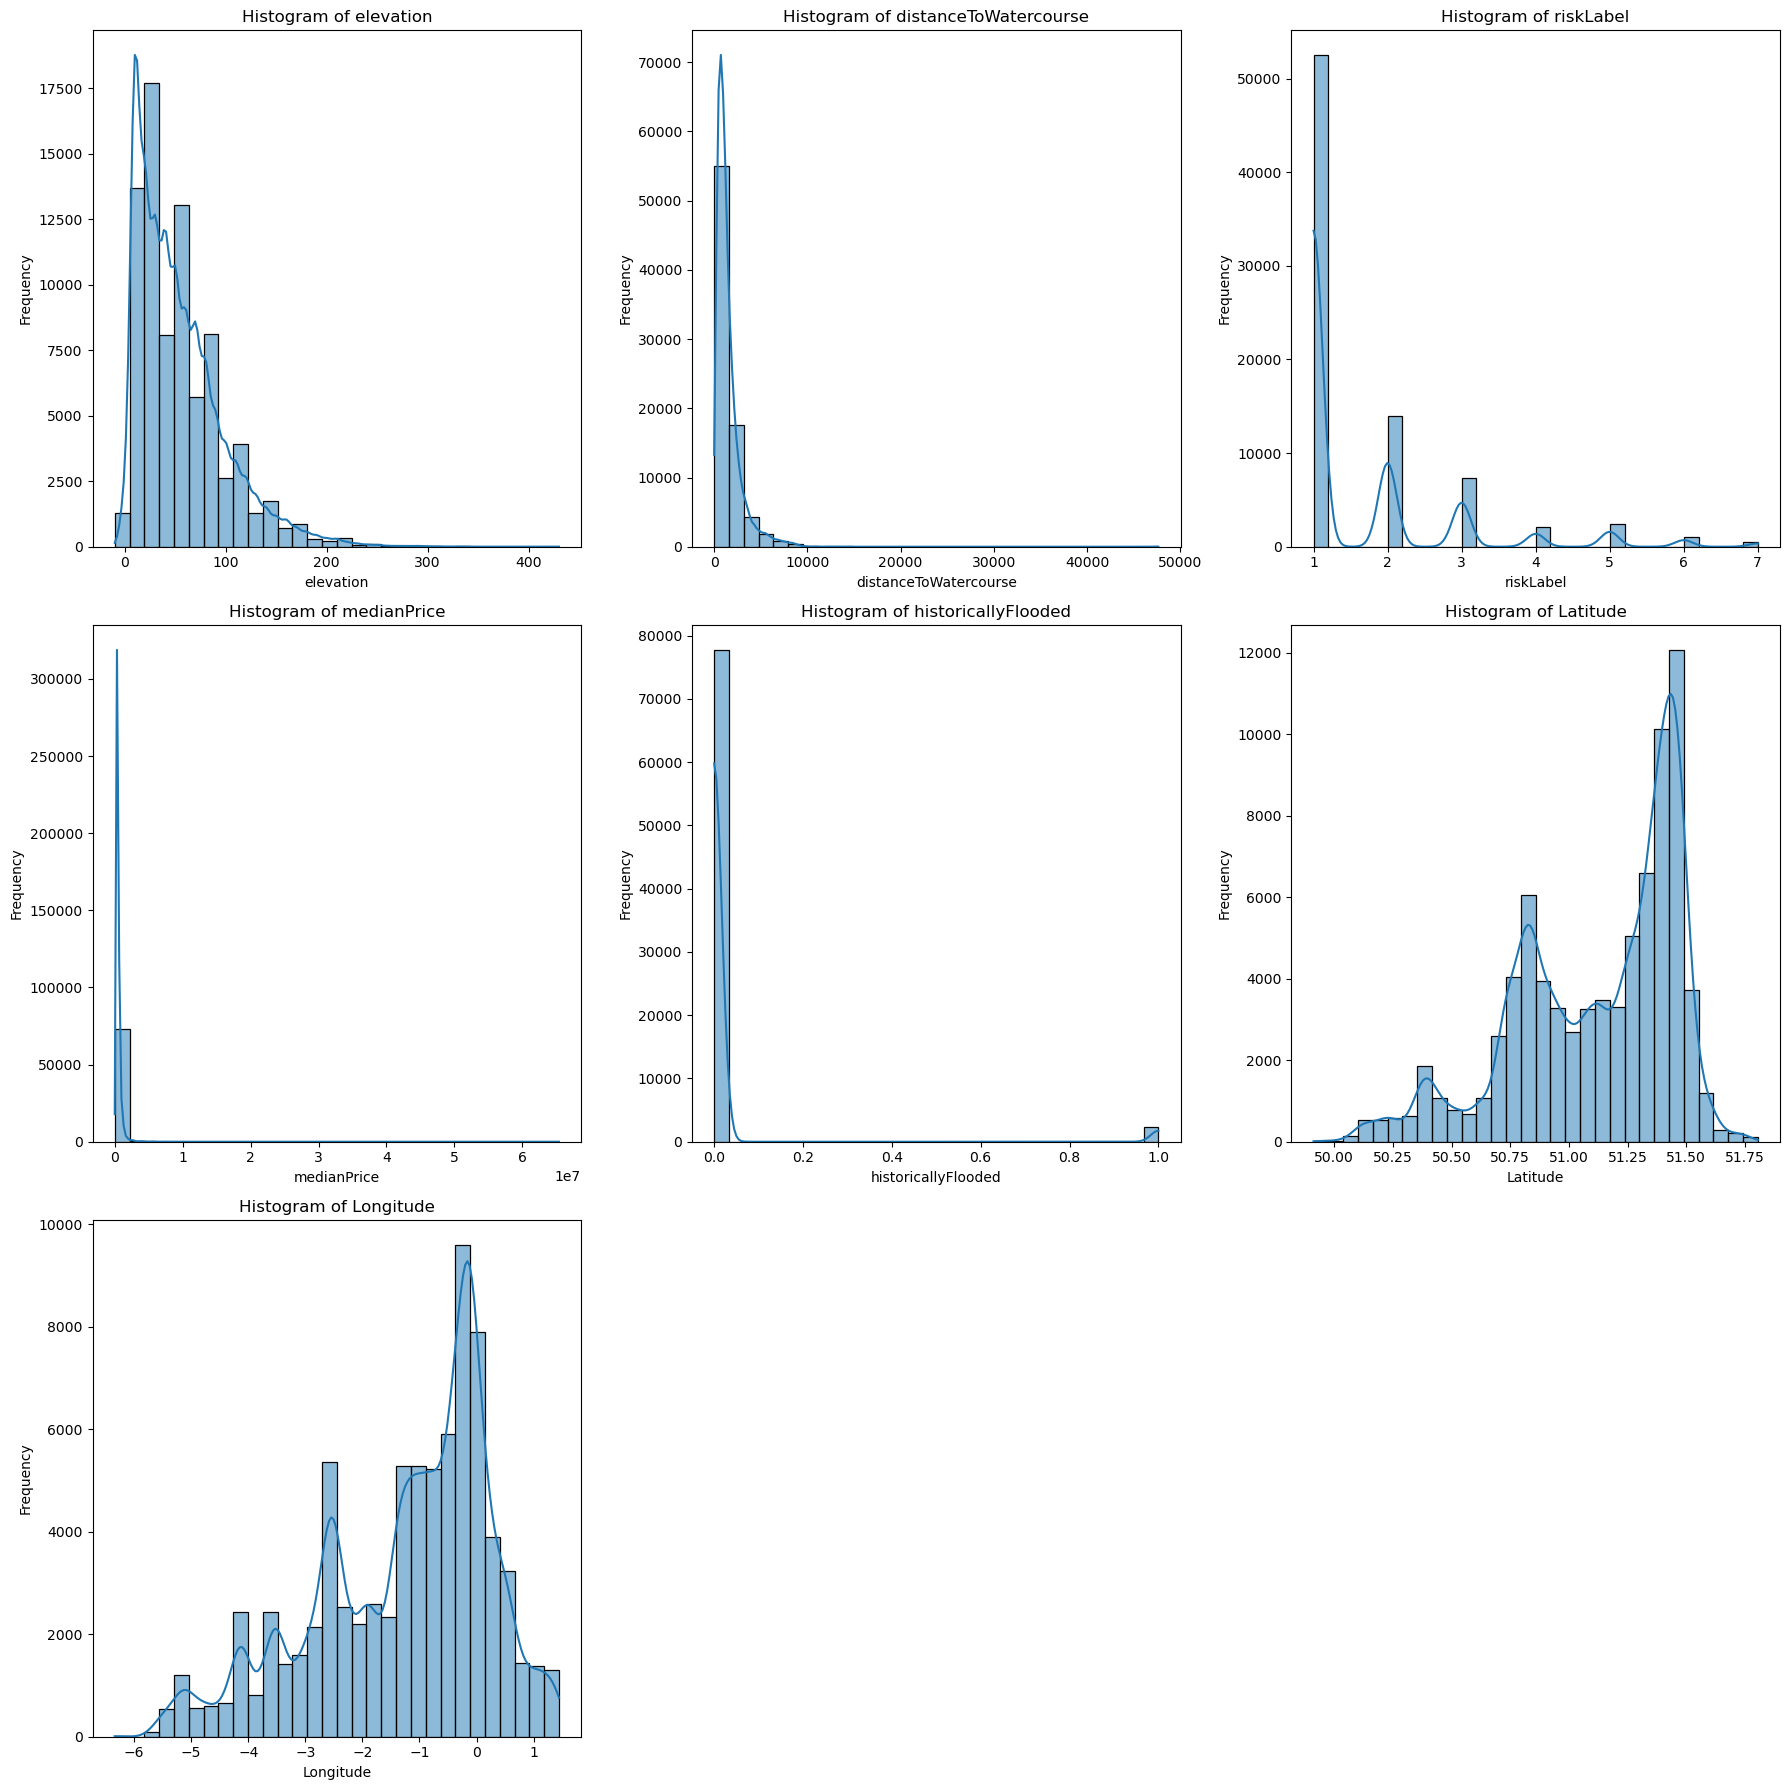

In [44]:
def plot_all_histograms(df, bins=30):
    """
    Plots a histogram for each numeric column in the DataFrame in a grid layout.
    
    Parameters:
    - df: pandas DataFrame with data.
    - bins: int, the number of bins for the histograms.
    """
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    num_cols = len(numeric_cols)
    num_rows = (num_cols + 2) // 3  # Adjust the number of rows based on the number of columns

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], bins=bins, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_all_histograms(postcodes_labelled)


#elevation, distacnetoWaterscourse skwewed: robust scaler

<Axes: xlabel='medianPrice'>

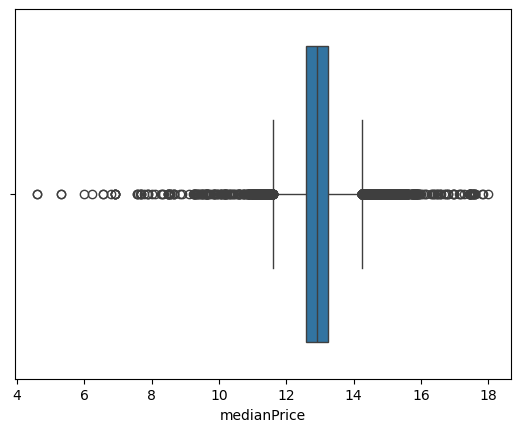

In [45]:
sns.boxplot(np.log(postcodes_labelled['medianPrice']), orient='h')
#4to 11.9, 11.9 to 14.2, 14.2 inf because we want to be rich.


In [46]:
# Create bins for log-transformed medianPrice
bins = [-np.inf, 11.9, 14.2, np.inf]
labels = ['Low', 'Medium', 'High']

# Apply log transformation and binning
postcodes_labelled['log_medianPrice'] = np.log(postcodes_labelled['medianPrice'])
postcodes_labelled['price_category'] = pd.cut(postcodes_labelled['log_medianPrice'], bins=bins, labels=labels)

# Display the first few rows to verify
postcodes_labelled[['medianPrice', 'log_medianPrice', 'price_category']].head()
# postcodes_labelled.isnull().sum()

,medianPrice,log_medianPrice,price_category
0,621800.0,13.340374,Medium
1,577900.0,13.267156,Medium
2,533300.0,13.186839,Medium
3,563600.0,13.242100,Medium
4,570800.0,13.254794,Medium


<Axes: ylabel='distanceToWatercourse'>

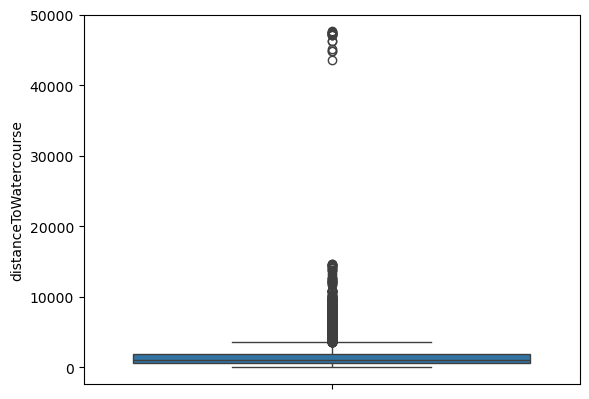

In [47]:
#postocodes_labelled.drop(columns=['easting', 'northing'], inplace=True)
postcodes_labelled.head()
#binning on median Price, 
#how to handle the imbalanced data: do we want to be cautious, or not. 
postcodes_labelled['historicallyFlooded'].value_counts() # Have the postcodes that have been flooded, 
sns.boxplot(postcodes_labelled['distanceToWatercourse'])

<Axes: xlabel='medianPrice'>

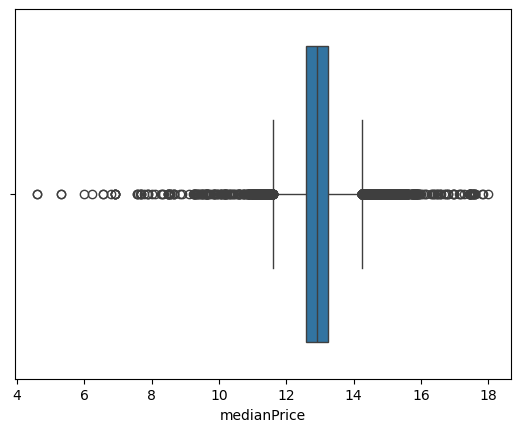

In [48]:
sns.boxplot(np.log(postcodes_labelled['medianPrice']), orient = 'h')

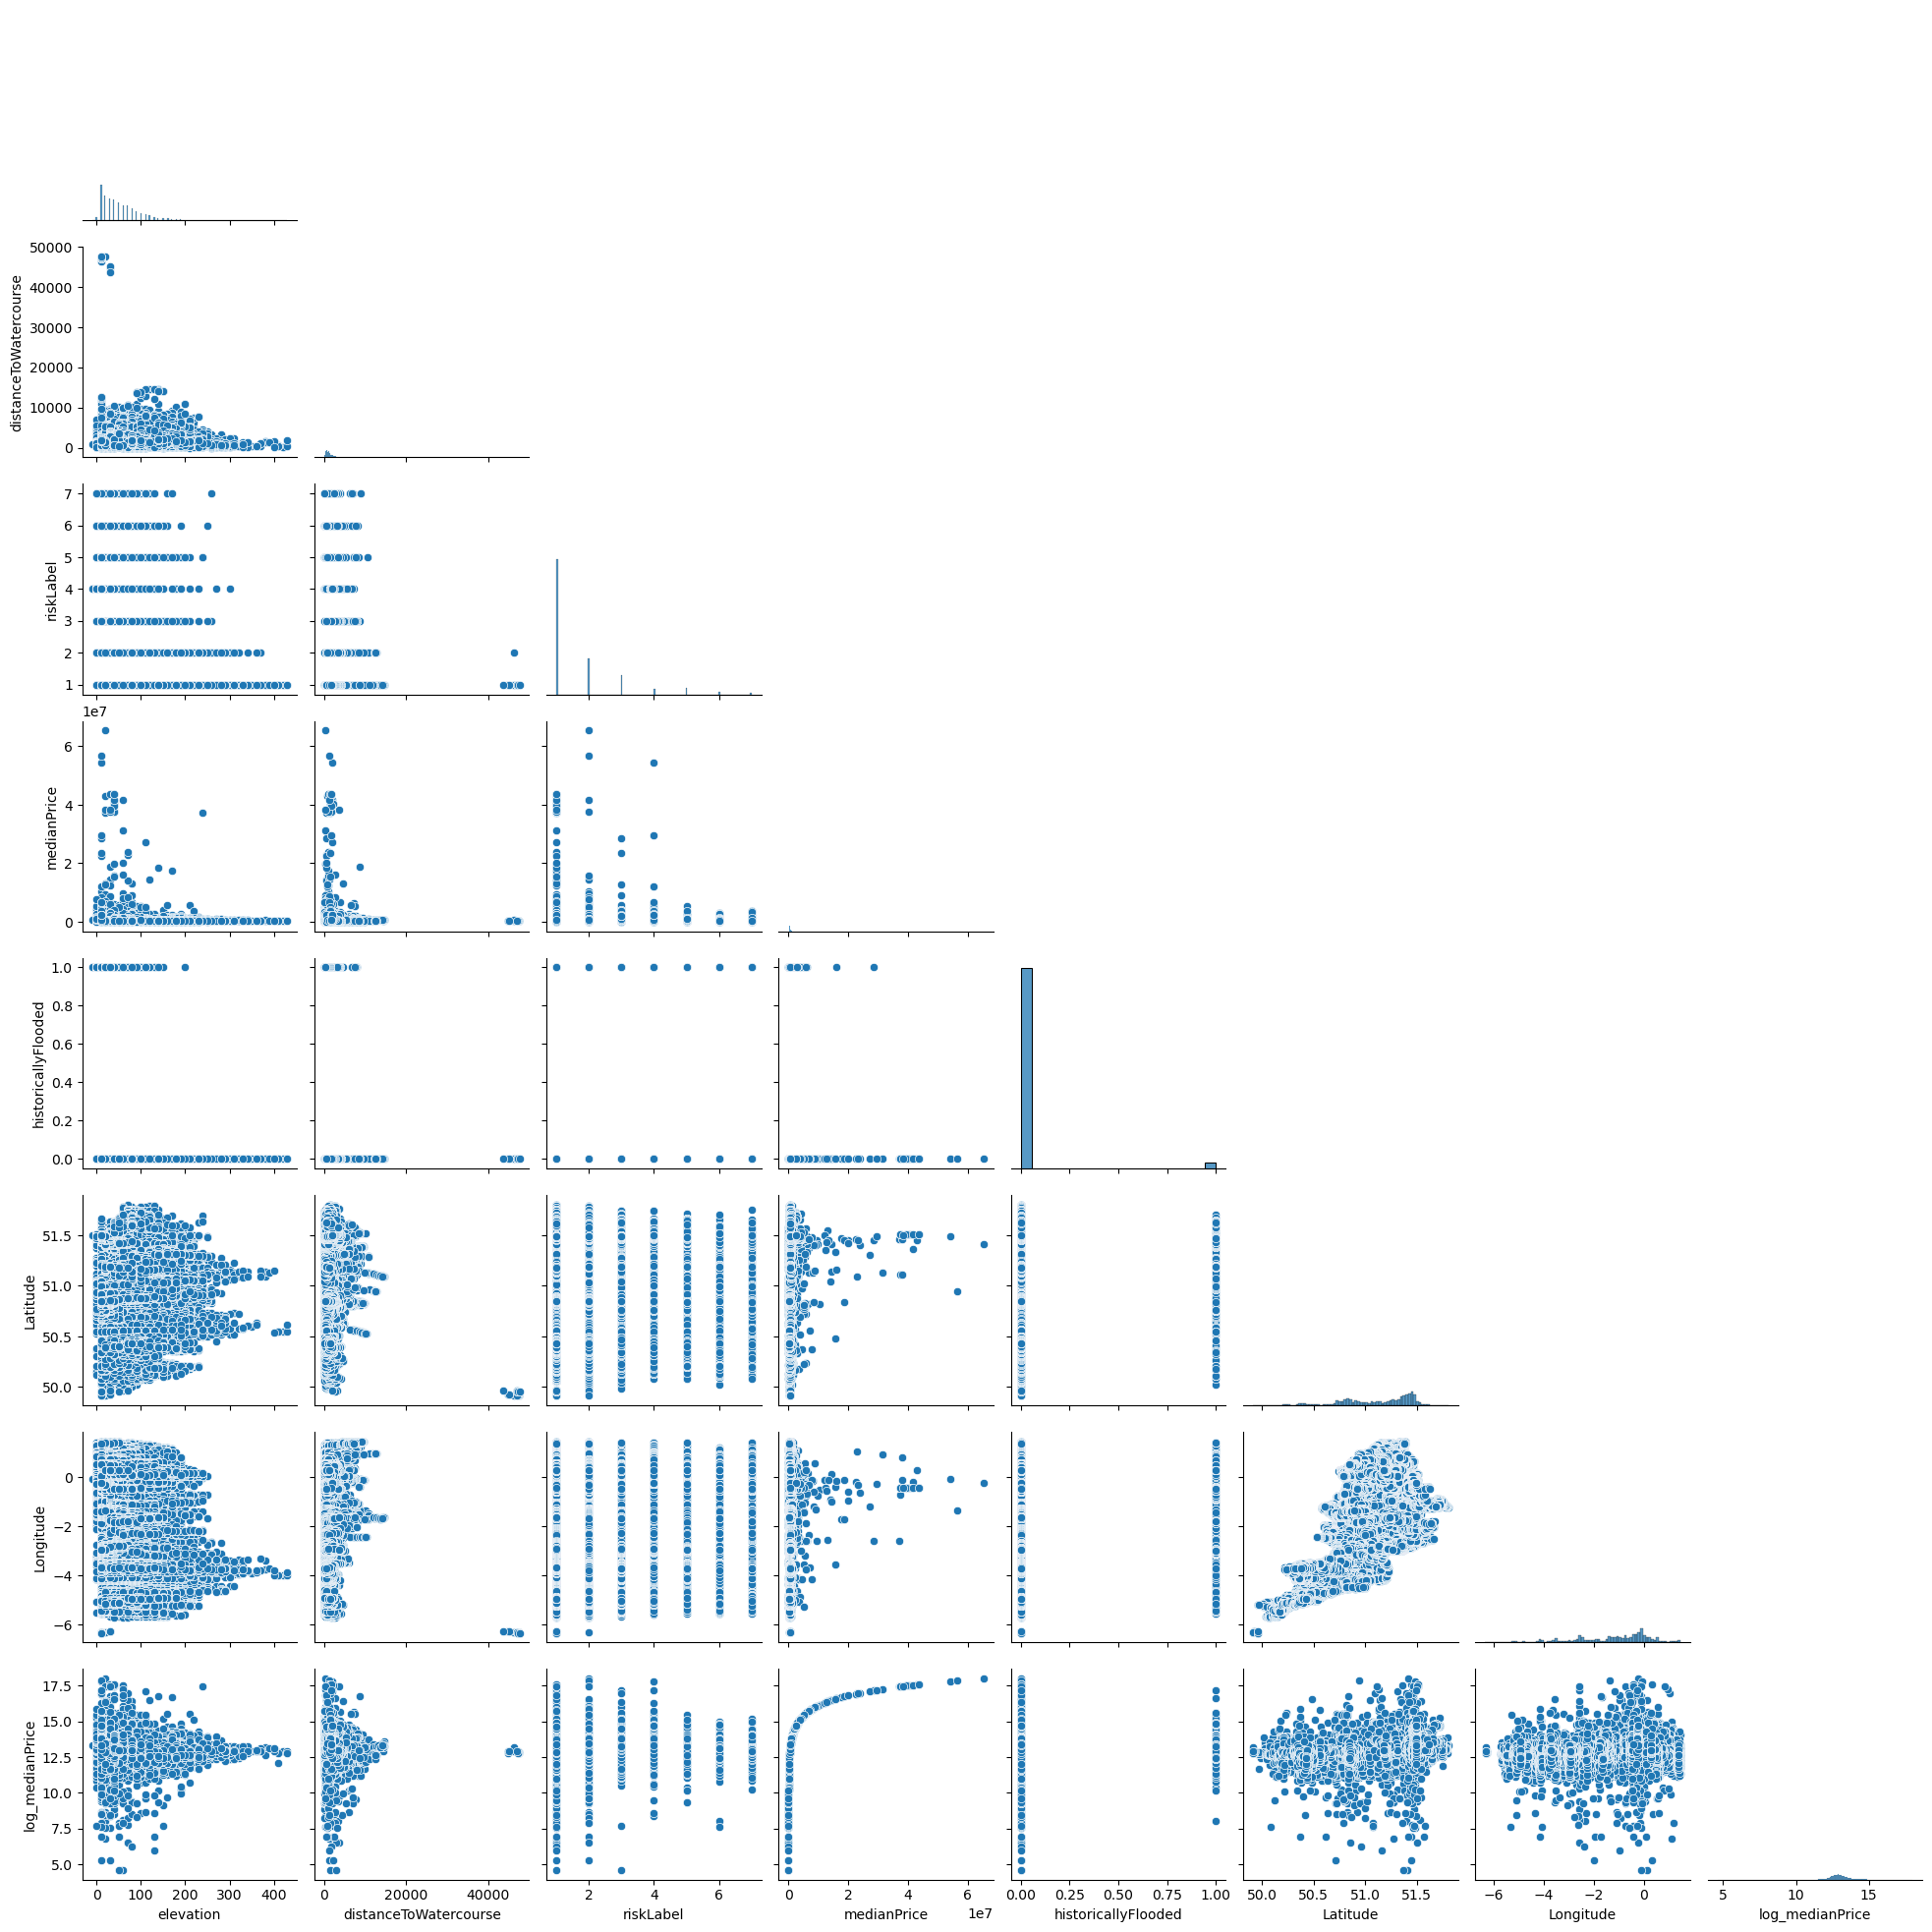

In [49]:
#sns.boxplot(postocodes_labelled['elevation'], orient = 'h')
sns.pairplot(postcodes_labelled, corner = 'True')

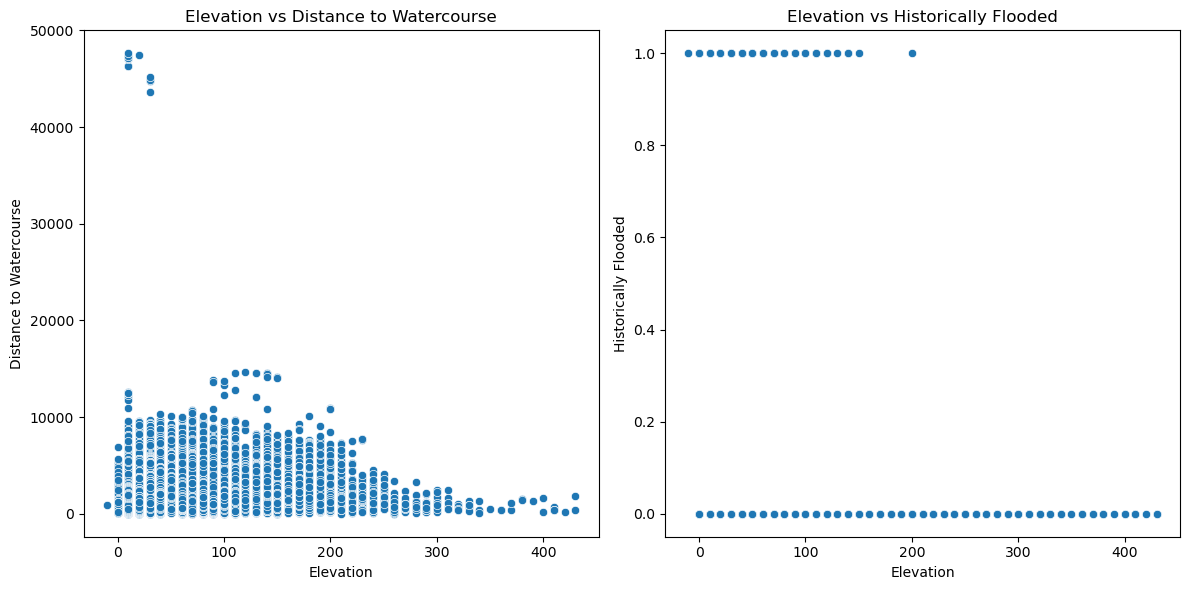

In [50]:
# Plot elevation vs distance to watercourse
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='elevation', y='distanceToWatercourse', data=postcodes_labelled)
plt.title('Elevation vs Distance to Watercourse')
plt.xlabel('Elevation')
plt.ylabel('Distance to Watercourse')

# Plot elevation vs historically flooded
plt.subplot(1, 2, 2)
sns.scatterplot(x='elevation', y='historicallyFlooded', data=postcodes_labelled)
plt.title('Elevation vs Historically Flooded')
plt.xlabel('Elevation')
plt.ylabel('Historically Flooded')

plt.tight_layout()
plt.show()

<Axes: >

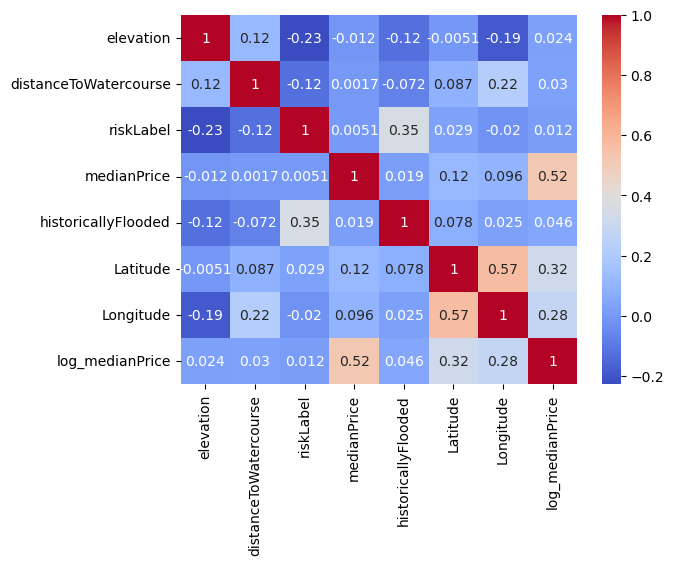

In [51]:
numerical_col = postcodes_labelled.select_dtypes(include=np.number)
sns.heatmap(numerical_col.corr(), annot=True, cmap='coolwarm')

In [52]:
postcodes_labelled['elevation'].describe()

count    80000.000000
mean        54.313500
std         43.631669
min        -10.000000
25%         20.000000
50%         40.000000
75%         80.000000
max        430.000000
Name: elevation, dtype: float64

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Define preprocessing for numeric columns (impute missing values, log transform, and scale)
# numeric_features = ['elevation', 'distanceToWatercourse', 'medianPrice']

def log_transform(x):
    return np.log1p(x+10)

numeric_features = ['elevation', 'distanceToWatercourse']
numeric_remained = ['Latitude', 'Longitude']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log_transform', FunctionTransformer(log_transform, validate=True)),
    ('scaler', RobustScaler())
])

# Define preprocessing for categorical columns (one-hot encode)
categorical_features = ['soilType', 'nearestWatercourse']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_remained_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('num_rem', numeric_remained_transformer, numeric_remained)
    ])


# 定义采样策略
# over = SMOTE(sampling_strategy={6: 1000, 7: 1000}, random_state=42)  # 对所有少数类过采样
over = SMOTE(random_state=42)
under = RandomUnderSampler(sampling_strategy={1: 10000}, random_state=42)  # 可选：调整多数类样本数

# 构建采样 Pipeline
oversample_pipeline = Pipeline([
    ('over', over),  # 过采样
    ('under', under)  # 欠采样（可选）
])


standard_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


In [54]:
oversample_pipeline

Pipeline(steps=[('over', SMOTE(random_state=42)),
                ('under',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy={1: 10000}))])

In [55]:
standard_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<function log_transform at 0x31ac209a0>,
                                                                                       validate=True)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['elevation',
                                                   'distanceToWatercourse']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['soilType',
                                                   'nearestWatercourse']),
                                                 ('num_rem',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Latitude',
                                                   'Longitude'])]))])

In [56]:
postcodes_labelled.head()

,postcode,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded,Latitude,Longitude,log_medianPrice,price_category
0,BA1 1AL,Unsurveyed/Urban,20,River Avon,1240.0,Bath and North East Somerset,5,621800.0,1,51.379625,-2.363284,13.340374,Medium
1,BA1 1AN,Unsurveyed/Urban,20,River Avon,1550.0,Bath and North East Somerset,3,577900.0,0,51.379000,-2.358926,13.267156,Medium
2,BA1 1AR,Unsurveyed/Urban,20,River Avon,1540.0,Bath and North East Somerset,5,533300.0,1,51.378585,-2.359282,13.186839,Medium
3,BA1 1BG,Unsurveyed/Urban,30,River Avon,1450.0,Bath and North East Somerset,1,563600.0,0,51.383215,-2.359763,13.242100,Medium
4,BA1 1BH,Unsurveyed/Urban,30,River Avon,1410.0,Bath and North East Somerset,1,570800.0,0,51.382862,-2.360321,13.254794,Medium


In [ ]:
# Split the data into training and testing sets

# data_t2 = postcodes_labelled#.drop(columns=['nearestWatercourse'])
# data_t2 = data_t2.dropna()

# X包括特征soilType, nearestWatercourse, elevation, distanceToWatercourse, medianPrice, Latitude, Longitude
# y包括目标riskLabel

X = postcodes_labelled.drop(columns=['postcode', 'riskLabel', 'log_medianPrice', 'price_category', 'medianPrice', ''])
y = postcodes_labelled['riskLabel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline
X_train_transformed = standard_pipeline.fit_transform(X_train)
X_test_transformed = standard_pipeline.transform(X_test)

from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN()
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_transformed, y_train)



In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

randomforest = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=200, max_depth=10)
randomforest.fit(X_train_resampled, y_train_resampled)
y_pred = randomforest.predict(X_test_transformed)

accuracy_score = randomforest.score(X_test_transformed, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [60]:
print(f'Accuracy: {accuracy_score:.8f}')
print(f'Precision: {precision:.8f}')
print(f'Recall: {recall:.8f}')
print(f'F1: {f1:.8f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.45666667
Precision: 0.60981617
Recall: 0.45666667
F1: 0.50529781
              precision    recall  f1-score   support

           1       0.79      0.53      0.63     15876
           2       0.29      0.39      0.33      4165
           3       0.26      0.09      0.13      2134
           4       0.18      0.57      0.28       628
           5       0.18      0.40      0.25       730
           6       0.03      0.19      0.05       314
           7       0.05      0.39      0.08       153

    accuracy                           0.46     24000
   macro avg       0.25      0.37      0.25     24000
weighted avg       0.61      0.46      0.51     24000



In [ ]:
y_probs = randomforest.predict_proba(X_test_transformed)[:, 1]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, precision_score, recall_score

# get the probabilities
y_probs = randomforest.predict_proba(X_test_transformed)[:, 1]  # 取正类的预测概率

# initialize an empty list to store F1 scores
f1_scores = []

# iterate through all possible thresholds
for threshold in np.arange(0.0, 1.1, 0.05):
    # convert probabilities to binary predictions using the threshold
    y_pred = (y_probs >= threshold).astype(int)
    
    # calculate F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

# find the threshold with the highest F1 score
best_threshold = np.arange(0.0, 1.1, 0.05)[np.argmax(f1_scores)]
print(f"Best threshold for balancing precision and recall: {best_threshold:.5f}")

# convert probabilities to binary predictions using the best threshold
y_pred_best = (y_probs >= best_threshold).astype(int)

# calculate precision and recall at the best threshold
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
print(f"Precision at best threshold: {precision:.5f}")
print(f"Recall at best threshold: {recall:.5f}")

Best threshold for balancing precision and recall: 0.10000
Precision at best threshold: 0.45678
Recall at best threshold: 0.64633


/opt/anaconda3/envs/npp2024/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/npp2024/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# define Random Forest models and params
rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

# Optimizing
rf_search = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=5, scoring='neg_mean_squared_error', random_state=42)

# Train the model
rf_search.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

rf_best_t4 = rf_search.best_estimator_
y_pred_t4 = rf_best_t4.predict(X_test_transformed)

# y_pred_proba = rf_best_t4.predict_proba(X_test)[:, 1]
    
accuracy = accuracy_score(y_test, y_pred_t4)
precision = precision_score(y_test, y_pred_t4)
recall = recall_score(y_test, y_pred_t4)
f1 = f1_score(y_test, y_pred_t4)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [ ]:
print(postcodes_labelled['historicallyFlooded'].dtype)

int64
